In [1]:
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt
import time

In [2]:
df=pd.read_csv("updated_dataset.csv")

In [3]:
df.head()

,url,type
0,br-icloud.com.br,malicious
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,malicious
4,http://adventure-nicaragua.net/index.php?optio...,malicious


In [4]:
df[df['type'] == 'malicious'].sample(5)

,url,type
430486,6gq2jtjbgnetygzgz1j1.littlematchagirl.com.au,malicious
21876,aprilbrinson.com,malicious
61976,http://www.nordseemiete.de/nordfriesische-inse...,malicious
164216,http://www.stagsbreath.co.uk/component/user/re...,malicious
32422,http://hotlinegsm.com/products/mobile-and-tabl...,malicious


In [5]:
df[df['type'] == 'benign'].sample(5)

,url,type
224895,amazon.com/Contour-Design-Showcase-classic-Bla...,benign
208315,http://motthegioi.vn/the-gioi-xe/nhap-nhang-xe...,benign
511590,amcarguide.com/muscle-cars/pontiac-firebird-19...,benign
137821,chooseyourprocessor.com/Pivotal.htm,benign
255692,wvculture.org/vrr/va_dcsearch.aspx,benign


In [6]:
print(df.type.unique())

['malicious' 'benign']


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB
None


In [8]:
df.isnull().sum() # there is no missing values

url     0
type    0
dtype: int64

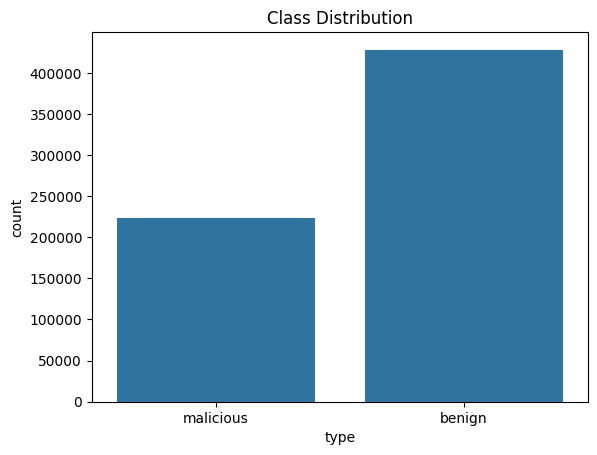

In [9]:
sns.countplot(x='type', data=df)
plt.title('Class Distribution')
plt.show()

In [10]:
class_column = df['type']
class_counts = class_column.value_counts()
print(class_counts)

type
benign       428103
malicious    223088
Name: count, dtype: int64


In [11]:
import re
def preprocess_url(url):
    url = re.sub(r'^www\.', '', url)
    return url
df['cleaned-url'] = df['url'].map(preprocess_url)
df.head()

,url,type,cleaned-url
0,br-icloud.com.br,malicious,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,mp3raid.com/music/krizz_kaliko.html
2,bopsecrets.org/rexroth/cr/1.htm,benign,bopsecrets.org/rexroth/cr/1.htm
3,http://www.garage-pirenne.be/index.php?option=...,malicious,http://www.garage-pirenne.be/index.php?option=...
4,http://adventure-nicaragua.net/index.php?optio...,malicious,http://adventure-nicaragua.net/index.php?optio...


# Performing Tokenization

In [12]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

#tokenization example
df.url[0]
tokenizer.tokenize(df.url[0])

['br', 'icloud', 'com', 'br']

In [13]:
import nltk
from nltk.corpus import stopwords

In [14]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\msf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
print('Getting words tokenized ...')
t0= time.perf_counter()
df['text_tokenized'] = df['cleaned-url'].map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 3.450920999996015 sec


In [16]:
df.sample(5)

,url,type,cleaned-url,text_tokenized
359050,http://www.evasteinberger.at/de/berichte.html?...,malicious,http://www.evasteinberger.at/de/berichte.html?...,"[http, www, evasteinberger, at, de, berichte, ..."
190006,http://www.m2packarab.com/index.php?option=com...,malicious,http://www.m2packarab.com/index.php?option=com...,"[http, www, m, packarab, com, index, php, opti..."
308996,http://sfhhz.com/channels/141.html,malicious,http://sfhhz.com/channels/141.html,"[http, sfhhz, com, channels, html]"
235452,campusden.com/About_UM_Mens_Basketball_s/4238.htm,benign,campusden.com/About_UM_Mens_Basketball_s/4238.htm,"[campusden, com, About, UM, Mens, Basketball, ..."
304163,reference.com/browse/elgin,benign,reference.com/browse/elgin,"[reference, com, browse, elgin]"


In [17]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokenized_text):
    filtered_text = [word for word in tokenized_text if word.lower() not in stop_words]
    return filtered_text
df['text_no_stopwords'] = df['text_tokenized'].apply(remove_stopwords)

In [18]:
df.sample(5)

,url,type,cleaned-url,text_tokenized,text_no_stopwords
49648,linkedin.com/directory/people/mironova.html,benign,linkedin.com/directory/people/mironova.html,"[linkedin, com, directory, people, mironova, h...","[linkedin, com, directory, people, mironova, h..."
347061,sakura-house.com/,benign,sakura-house.com/,"[sakura, house, com]","[sakura, house, com]"
481230,http://join.teen-depot.com/track/MzAwMDAwMy45L...,malicious,http://join.teen-depot.com/track/MzAwMDAwMy45L...,"[http, join, teen, depot, com, track, MzAwMDAw...","[http, join, teen, depot, com, track, MzAwMDAw..."
157477,footballfanatics.com/NBA_Los_Angeles_Clippers,benign,footballfanatics.com/NBA_Los_Angeles_Clippers,"[footballfanatics, com, NBA, Los, Angeles, Cli...","[footballfanatics, com, NBA, Los, Angeles, Cli..."
143410,facebook.com/people/Lloyd-Klein/1481462004,benign,facebook.com/people/Lloyd-Klein/1481462004,"[facebook, com, people, Lloyd, Klein]","[facebook, com, people, Lloyd, Klein]"


In [19]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
print('Getting words stemmed ...')
t0= time.perf_counter()
df['text_stemmed'] = df['text_no_stopwords'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 58.70789589999913 sec


In [20]:
df.sample(5)

,url,type,cleaned-url,text_tokenized,text_no_stopwords,text_stemmed
115500,sportsillustrated.cnn.com/football/nfl/preview...,benign,sportsillustrated.cnn.com/football/nfl/preview...,"[sportsillustrated, cnn, com, football, nfl, p...","[sportsillustrated, cnn, com, football, nfl, p...","[sportsillustr, cnn, com, footbal, nfl, previe..."
136400,tvguide.com/celebrities/godfrey-cambridge/152381,benign,tvguide.com/celebrities/godfrey-cambridge/152381,"[tvguide, com, celebrities, godfrey, cambridge]","[tvguide, com, celebrities, godfrey, cambridge]","[tvguid, com, celebr, godfrey, cambridg]"
198381,http://mic.com/articles/111696/my-morning-jack...,benign,http://mic.com/articles/111696/my-morning-jack...,"[http, mic, com, articles, my, morning, jacket...","[http, mic, com, articles, morning, jacket, ne...","[http, mic, com, articl, morn, jacket, new, si..."
213025,trueknowledge.com/q/what_is_joe_riggert%27s_mi...,benign,trueknowledge.com/q/what_is_joe_riggert%27s_mi...,"[trueknowledge, com, q, what, is, joe, riggert...","[trueknowledge, com, q, joe, riggert, middle, ...","[trueknowledg, com, q, joe, riggert, middl, name]"
553131,http://45.95.168.207/awiotiwhiogoihahogahoi/gu...,malicious,http://45.95.168.207/awiotiwhiogoihahogahoi/gu...,"[http, awiotiwhiogoihahogahoi, gucci, arm]","[http, awiotiwhiogoihahogahoi, gucci, arm]","[http, awiotiwhiogoihahogahoi, gucci, arm]"


In [21]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\msf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
print('Getting joiningwords ...')
t0= time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')
df.sample(5)

Getting joiningwords ...
Time taken 0.29886079999414505 sec


,url,type,cleaned-url,text_tokenized,text_no_stopwords,text_stemmed,text_sent
374183,pillowsandpancakes.com/country/Canada/Quebec/M...,benign,pillowsandpancakes.com/country/Canada/Quebec/M...,"[pillowsandpancakes, com, country, Canada, Que...","[pillowsandpancakes, com, country, Canada, Que...","[pillowsandpancak, com, countri, canada, quebe...",pillowsandpancak com countri canada quebec mon...
15975,ewrestlingnews.com/stories/Stacy_KeiblerTest_D...,benign,ewrestlingnews.com/stories/Stacy_KeiblerTest_D...,"[ewrestlingnews, com, stories, Stacy, KeiblerT...","[ewrestlingnews, com, stories, Stacy, KeiblerT...","[ewrestlingnew, com, stori, staci, keiblertest...",ewrestlingnew com stori staci keiblertest deat...
564908,vinacas.com.vn/uploads/assets/vinacas_tvc/comm...,benign,vinacas.com.vn/uploads/assets/vinacas_tvc/comm...,"[vinacas, com, vn, uploads, assets, vinacas, t...","[vinacas, com, vn, uploads, assets, vinacas, t...","[vinaca, com, vn, upload, asset, vinaca, tvc, ...",vinaca com vn upload asset vinaca tvc commerzr...
342158,imdb.com/name/nm0341176/,benign,imdb.com/name/nm0341176/,"[imdb, com, name, nm]","[imdb, com, name, nm]","[imdb, com, name, nm]",imdb com name nm
358461,yelp.com/biz/carrington-college-california-san...,benign,yelp.com/biz/carrington-college-california-san...,"[yelp, com, biz, carrington, college, californ...","[yelp, com, biz, carrington, college, californ...","[yelp, com, biz, carrington, colleg, californi...",yelp com biz carrington colleg california san ...


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df.text_sent)
y=df['type']

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(df.text_sent)

In [30]:
from sklearn.feature_extraction.text import HashingVectorizer
hash_vectorizer = HashingVectorizer(n_features=10000)
hashed_matrix = hash_vectorizer.fit_transform(df.text_sent)

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
hashed_matrix_abs = abs(hashed_matrix)
scaler = MaxAbsScaler()
hashed_matrix = scaler.fit_transform(hashed_matrix_abs)

# Model training

In [ ]:
!pip install scikit-learn

In [32]:
from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to the target variable and transform it
y_enc = label_encoder.fit_transform(df['type'])

In [33]:
# trainX_tf, testX_tf, trainY_tf, testY_tf = train_test_split(tfidf_matrix,y)
# trainX_ct,testX_ct,trainY_ct,testY_ct=train_test_split(count_matrix,y)
# trainX_hs,testX_hs,trainY_hs,testY_hs=train_test_split(hashed_matrix,y)

In [51]:
#label encoded target
trainX_tf, testX_tf, trainY_tf, testY_tf = train_test_split(tfidf_matrix,y_enc)
trainX_ct,testX_ct,trainY_ct,testY_ct=train_test_split(count_matrix,y_enc)
trainX_hs,testX_hs,trainY_hs,testY_hs=train_test_split(hashed_matrix,y_enc)

In [42]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(n_estimators=50, random_state=62)
random_forest_clf.fit(trainX_ct, trainY_ct)

RandomForestClassifier(n_estimators=50, random_state=62)

In [52]:
start_time = time.time()
print("Training Hashing Vector")
random_forest_hs = RandomForestClassifier(n_estimators=50, random_state=62, n_jobs=-1)
random_forest_hs.fit(trainX_hs, trainY_hs)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training completed in {elapsed_time:.3f} seconds.")

Training Hashing Vector
Training completed in 448.100 seconds.


Training Accuracy : 0.9914556514937766
Testing Accuracy : 0.937327239892382

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.98      0.93      0.95    112463
        Good       0.86      0.95      0.90     50335

    accuracy                           0.94    162798
   macro avg       0.92      0.94      0.93    162798
weighted avg       0.94      0.94      0.94    162798


CONFUSION MATRIX


<Axes: >

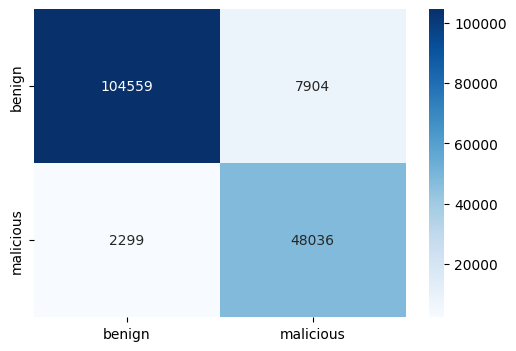

In [53]:
model=random_forest_hs
train_X=trainX_hs
train_Y=trainY_hs
test_X=testX_hs
test_Y=testY_hs
print('Training Accuracy :',model.score(train_X,train_Y))
print('Testing Accuracy :',model.score(test_X,test_Y))
con_mat = pd.DataFrame(confusion_matrix(model.predict(test_X), test_Y));


print('\nCLASSIFICATION REPORT\n')
print(classification_report(model.predict(test_X), test_Y,
                            target_names =['Bad','Good']))
classes = np.unique(y)
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)

In [46]:
start_time = time.time()
print("Training RF - TF")
random_forest_tf = RandomForestClassifier(n_estimators=50, random_state=62, n_jobs=-1)
random_forest_tf.fit(trainX_tf, trainY_tf)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training completed in {elapsed_time:.3f} seconds.")

Training RF - TF
Training completed in 1772.377 seconds.


In [55]:
import joblib
joblib.dump(random_forest_tf, 'random_forest_model.joblib',compress=3)

['random_forest_model.joblib']

Training Accuracy : 0.9991031812495265
Testing Accuracy : 0.9440533667489772

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.99      0.93      0.96    113248
        Good       0.86      0.97      0.91     49550

    accuracy                           0.94    162798
   macro avg       0.92      0.95      0.94    162798
weighted avg       0.95      0.94      0.94    162798


CONFUSION MATRIX


<Axes: >

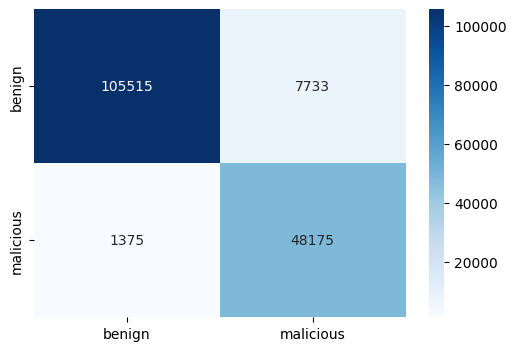

In [47]:
model=random_forest_tf
train_X=trainX_tf
train_Y=trainY_tf
test_X=testX_tf
test_Y=testY_tf
print('Training Accuracy :',model.score(train_X,train_Y))
print('Testing Accuracy :',model.score(test_X,test_Y))
con_mat = pd.DataFrame(confusion_matrix(model.predict(test_X), test_Y));


print('\nCLASSIFICATION REPORT\n')
print(classification_report(model.predict(test_X), test_Y,
                            target_names =['Bad','Good']))
classes = np.unique(y)
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)

Training Accuracy : 0.999400073301624
Testing Accuracy : 0.9432548311404317

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.98      0.93      0.96    113035
        Good       0.87      0.96      0.91     49763

    accuracy                           0.94    162798
   macro avg       0.92      0.95      0.94    162798
weighted avg       0.95      0.94      0.94    162798


CONFUSION MATRIX


<Axes: >

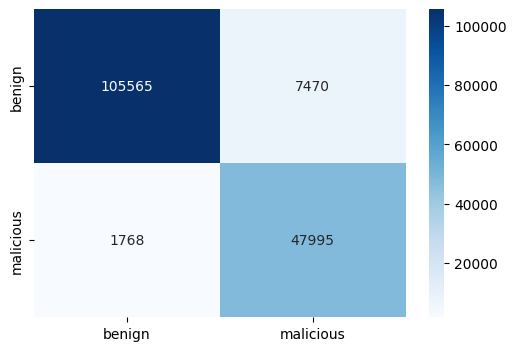

In [44]:
model=random_forest_clf
train_X=trainX_ct
train_Y=trainY_ct
test_X=testX_ct
test_Y=testY_ct
print('Training Accuracy :',model.score(train_X,train_Y))
print('Testing Accuracy :',model.score(test_X,test_Y))
con_mat = pd.DataFrame(confusion_matrix(model.predict(test_X), test_Y));


print('\nCLASSIFICATION REPORT\n')
print(classification_report(model.predict(test_X), test_Y,
                            target_names =['Bad','Good']))
classes = np.unique(y)
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)

In [41]:
mnb_ct = MultinomialNB()
mnb_ct.fit(trainX_ct,trainY_ct)

MultinomialNB()

In [42]:
mnb_tf = MultinomialNB()
mnb_tf.fit(trainX_tf,trainY_tf)

MultinomialNB()

In [43]:
mnb_hs = MultinomialNB()
mnb_hs.fit(trainX_hs,trainY_hs)

MultinomialNB()

In [34]:
logit_ct = LogisticRegression()
logit_ct.fit(trainX_ct, trainY_ct)

C:\Users\msf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
logit_tf = LogisticRegression()
logit_tf.fit(trainX_tf, trainY_tf)

LogisticRegression()

In [36]:
logit_hs = LogisticRegression()
logit_hs.fit(trainX_hs, trainY_hs)

LogisticRegression()

In [47]:
clf_ct = DecisionTreeClassifier()
clf_ct.fit(trainX_ct,trainY_ct)

DecisionTreeClassifier()

In [49]:
clf_hs = DecisionTreeClassifier()
clf_hs.fit(trainX_hs,trainY_hs)

DecisionTreeClassifier()

In [50]:
clf_tf = DecisionTreeClassifier()
clf_tf.fit(trainX_tf,trainY_tf)

DecisionTreeClassifier()

# Naive Bayes

Training Accuracy : 0.946878845519899
Testing Accuracy : 0.9111844125849212

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.96      0.91      0.93    112320
        Good       0.82      0.91      0.86     50478

    accuracy                           0.91    162798
   macro avg       0.89      0.91      0.90    162798
weighted avg       0.92      0.91      0.91    162798


CONFUSION MATRIX


<Axes: >

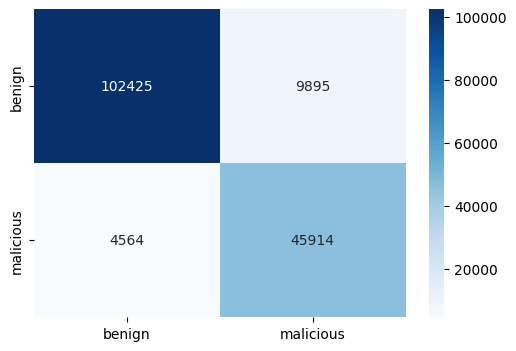

In [69]:
model=mnb_ct
train_X=trainX_ct
train_Y=trainY_ct
test_X=testX_ct
test_Y=testY_ct
print('Training Accuracy :',model.score(train_X,train_Y))
print('Testing Accuracy :',model.score(test_X,test_Y))
con_mat = pd.DataFrame(confusion_matrix(model.predict(test_X), test_Y));


print('\nCLASSIFICATION REPORT\n')
print(classification_report(model.predict(test_X), test_Y,
                            target_names =['Bad','Good']))
classes = np.unique(y)
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)

Training Accuracy : 0.9536377466507505
Testing Accuracy : 0.9119768056118626

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.98      0.90      0.94    116678
        Good       0.79      0.95      0.86     46120

    accuracy                           0.91    162798
   macro avg       0.88      0.92      0.90    162798
weighted avg       0.92      0.91      0.91    162798


CONFUSION MATRIX


<Axes: >

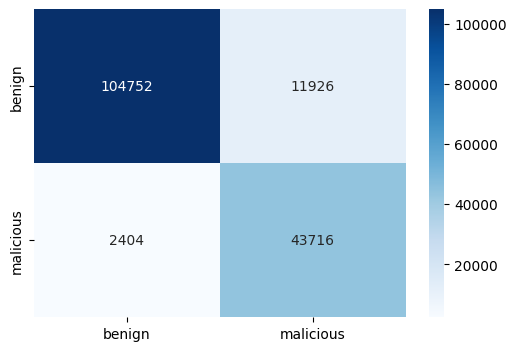

In [70]:
model=mnb_tf
train_X=trainX_tf
train_Y=trainY_tf
test_X=testX_tf
test_Y=testY_tf
print('Training Accuracy :',model.score(train_X,train_Y))
print('Testing Accuracy :',model.score(test_X,test_Y))
con_mat = pd.DataFrame(confusion_matrix(model.predict(test_X), test_Y));


print('\nCLASSIFICATION REPORT\n')
print(classification_report(model.predict(test_X), test_Y,
                            target_names =['Bad','Good']))
classes = np.unique(y)
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)

Training Accuracy : 0.8755735647316812
Testing Accuracy : 0.8720807380926056

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.95      0.87      0.91    117752
        Good       0.72      0.89      0.79     45046

    accuracy                           0.87    162798
   macro avg       0.83      0.88      0.85    162798
weighted avg       0.89      0.87      0.88    162798


CONFUSION MATRIX


<Axes: >

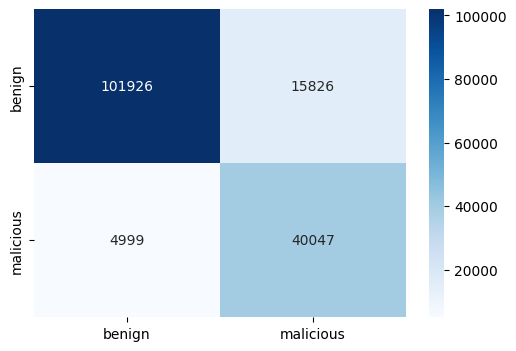

In [71]:
model=mnb_hs
train_X=trainX_hs
train_Y=trainY_hs
test_X=testX_hs
test_Y=testY_hs
print('Training Accuracy :',model.score(train_X,train_Y))
print('Testing Accuracy :',model.score(test_X,test_Y))
con_mat = pd.DataFrame(confusion_matrix(model.predict(test_X), test_Y));


print('\nCLASSIFICATION REPORT\n')
print(classification_report(model.predict(test_X), test_Y,
                            target_names =['Bad','Good']))
classes = np.unique(y)
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)

# Logistic Regression

Training Accuracy : 0.9572700673433076
Testing Accuracy : 0.9401343996854998

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.98      0.93      0.96    113249
        Good       0.86      0.96      0.91     49549

    accuracy                           0.94    162798
   macro avg       0.92      0.95      0.93    162798
weighted avg       0.95      0.94      0.94    162798


CONFUSION MATRIX


<Axes: >

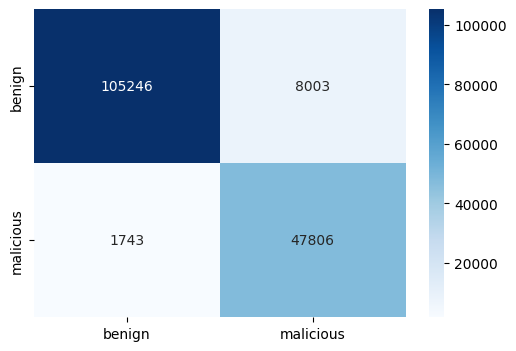

In [72]:
model=logit_ct
train_X=trainX_ct
train_Y=trainY_ct
test_X=testX_ct
test_Y=testY_ct
print('Training Accuracy :',model.score(train_X,train_Y))
print('Testing Accuracy :',model.score(test_X,test_Y))
con_mat = pd.DataFrame(confusion_matrix(model.predict(test_X), test_Y));


print('\nCLASSIFICATION REPORT\n')
print(classification_report(model.predict(test_X), test_Y,
                            target_names =['Bad','Good']))
classes = np.unique(y)
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)

Training Accuracy : 0.945412813041956
Testing Accuracy : 0.9332178527991745

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.99      0.92      0.95    115032
        Good       0.83      0.97      0.89     47766

    accuracy                           0.93    162798
   macro avg       0.91      0.94      0.92    162798
weighted avg       0.94      0.93      0.93    162798


CONFUSION MATRIX


<Axes: >

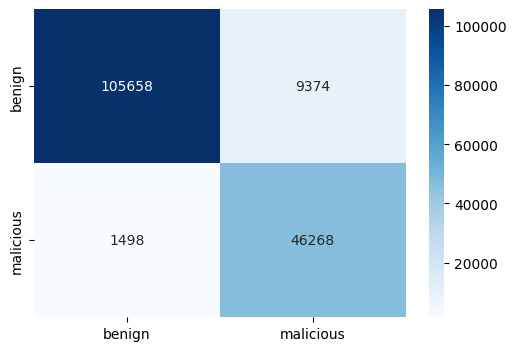

In [73]:
model=logit_tf
train_X=trainX_tf
train_Y=trainY_tf
test_X=testX_tf
test_Y=testY_tf
print('Training Accuracy :',model.score(train_X,train_Y))
print('Testing Accuracy :',model.score(test_X,test_Y))
con_mat = pd.DataFrame(confusion_matrix(model.predict(test_X), test_Y));


print('\nCLASSIFICATION REPORT\n')
print(classification_report(model.predict(test_X), test_Y,
                            target_names =['Bad','Good']))
classes = np.unique(y)
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)

Training Accuracy : 0.9204370251006874
Testing Accuracy : 0.914771680241772

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.97      0.91      0.94    113346
        Good       0.82      0.92      0.87     49452

    accuracy                           0.91    162798
   macro avg       0.89      0.92      0.90    162798
weighted avg       0.92      0.91      0.92    162798


CONFUSION MATRIX


<Axes: >

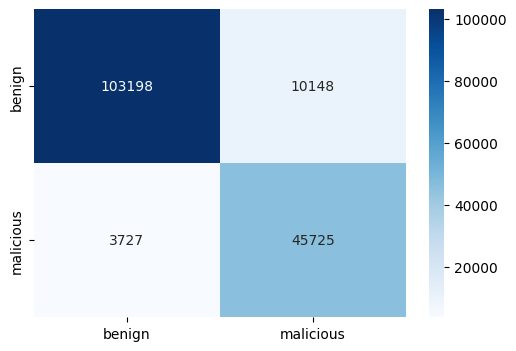

In [74]:
model=logit_hs
train_X=trainX_hs
train_Y=trainY_hs
test_X=testX_hs
test_Y=testY_hs
print('Training Accuracy :',model.score(train_X,train_Y))
print('Testing Accuracy :',model.score(test_X,test_Y))
con_mat = pd.DataFrame(confusion_matrix(model.predict(test_X), test_Y));


print('\nCLASSIFICATION REPORT\n')
print(classification_report(model.predict(test_X), test_Y,
                            target_names =['Bad','Good']))
classes = np.unique(y)
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)

# Decision Tree

Training Accuracy : 0.9996396344746956
Testing Accuracy : 0.9391208737208074

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.98      0.93      0.95    111796
        Good       0.87      0.95      0.91     51002

    accuracy                           0.94    162798
   macro avg       0.92      0.94      0.93    162798
weighted avg       0.94      0.94      0.94    162798


CONFUSION MATRIX


<Axes: >

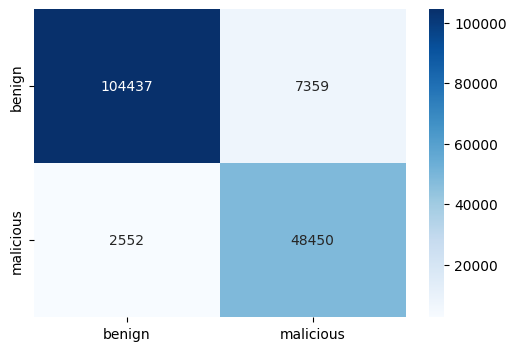

In [76]:
model=clf_ct
train_X=trainX_ct
train_Y=trainY_ct
test_X=testX_ct
test_Y=testY_ct
print('Training Accuracy :',model.score(train_X,train_Y))
print('Testing Accuracy :',model.score(test_X,test_Y))
con_mat = pd.DataFrame(confusion_matrix(model.predict(test_X), test_Y));


print('\nCLASSIFICATION REPORT\n')
print(classification_report(model.predict(test_X), test_Y,
                            target_names =['Bad','Good']))
classes = np.unique(y)
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)

Training Accuracy : 0.9996437295374831
Testing Accuracy : 0.9371921030970897

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.97      0.93      0.95    111485
        Good       0.87      0.94      0.90     51313

    accuracy                           0.94    162798
   macro avg       0.92      0.94      0.93    162798
weighted avg       0.94      0.94      0.94    162798


CONFUSION MATRIX


<Axes: >

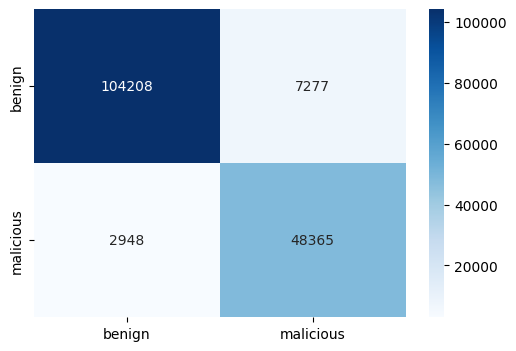

In [77]:
model=clf_tf
train_X=trainX_tf
train_Y=trainY_tf
test_X=testX_tf
test_Y=testY_tf
print('Training Accuracy :',model.score(train_X,train_Y))
print('Testing Accuracy :',model.score(test_X,test_Y))
con_mat = pd.DataFrame(confusion_matrix(model.predict(test_X), test_Y));


print('\nCLASSIFICATION REPORT\n')
print(classification_report(model.predict(test_X), test_Y,
                            target_names =['Bad','Good']))
classes = np.unique(y)
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)

Training Accuracy : 0.9916030737541284
Testing Accuracy : 0.9299254290593251

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.96      0.93      0.95    109905
        Good       0.87      0.92      0.90     52893

    accuracy                           0.93    162798
   macro avg       0.92      0.93      0.92    162798
weighted avg       0.93      0.93      0.93    162798


CONFUSION MATRIX


<Axes: >

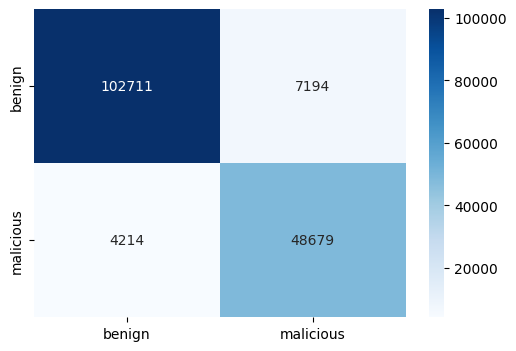

In [78]:
model=clf_hs
train_X=trainX_hs
train_Y=trainY_hs
test_X=testX_hs
test_Y=testY_hs
print('Training Accuracy :',model.score(train_X,train_Y))
print('Testing Accuracy :',model.score(test_X,test_Y))
con_mat = pd.DataFrame(confusion_matrix(model.predict(test_X), test_Y));


print('\nCLASSIFICATION REPORT\n')
print(classification_report(model.predict(test_X), test_Y,
                            target_names =['Bad','Good']))
classes = np.unique(y)
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)